In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Opioid_demographic_mortalities.csv")
df = df.drop(' Footnotes ',axis = 1)
df = df = df.iloc[1:]

In [4]:
df = df.rename(columns=lambda x: x.strip())


df = df.apply(lambda x: x.str.strip())
df = df.replace("NSD",0)




for col in df.columns[1:]:
    df[col] = df[col].str.replace(',', '')
    df[col] = df[col].astype(float)
    df[col] = df[col].fillna(0)

In [10]:
N = len(df['Location'])
state_codes = list(df['Location'].apply(lambda x: x.replace(" ","\n")))


N = len(df['Location'])
ind = np.arange(N)*5

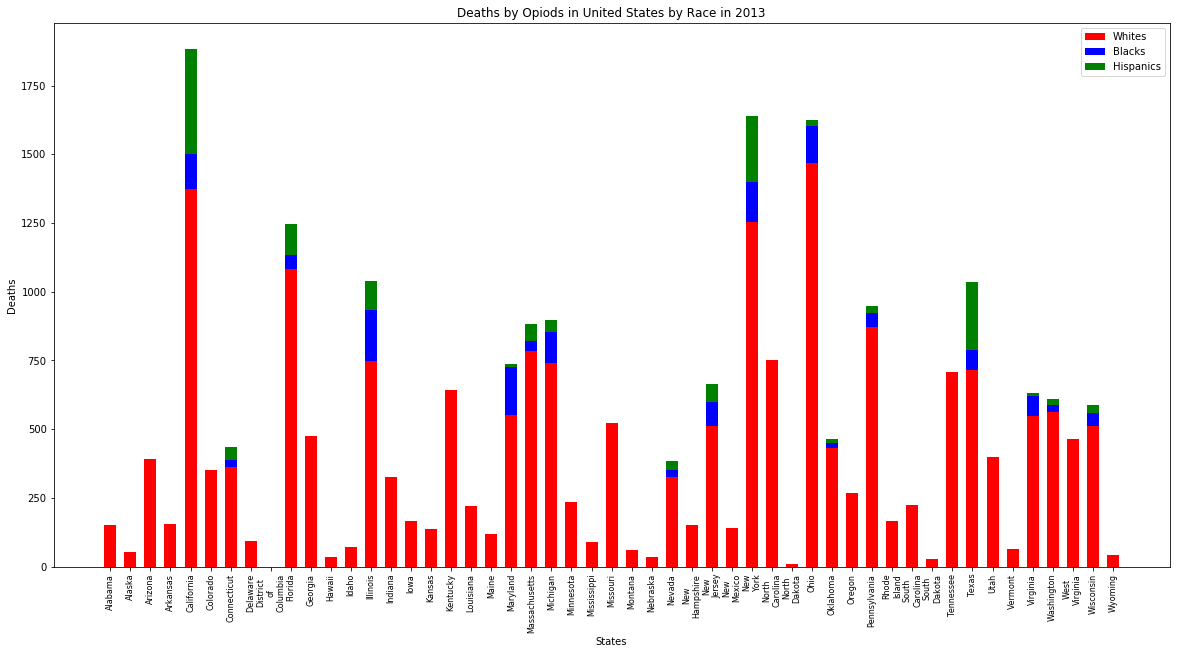

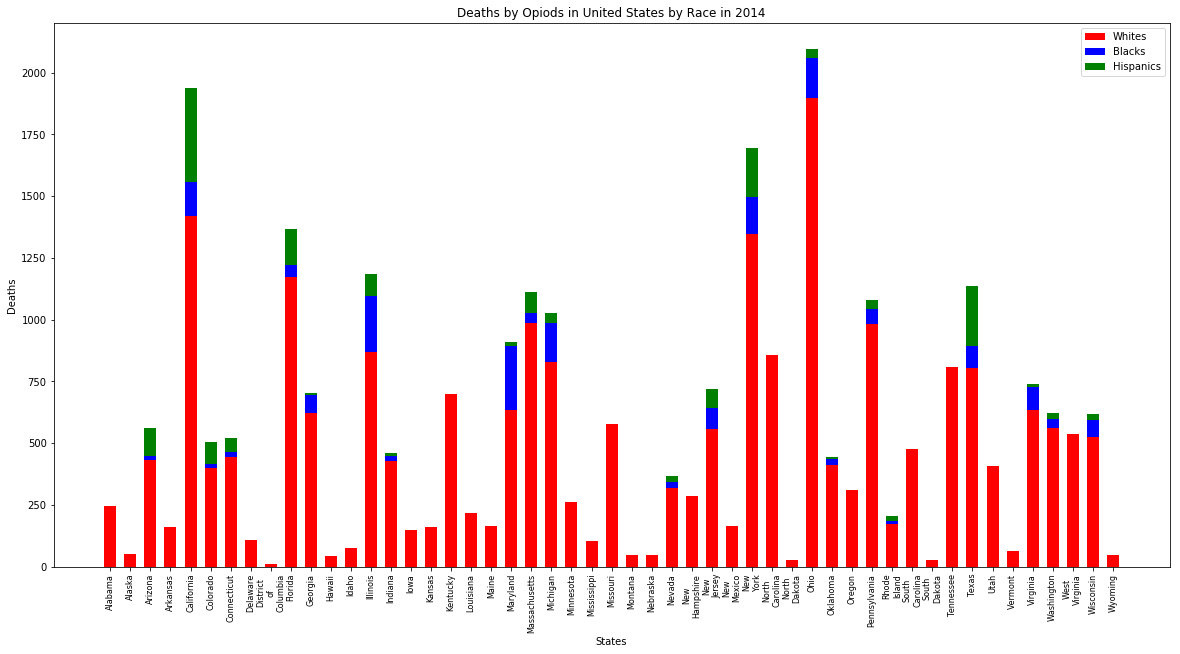

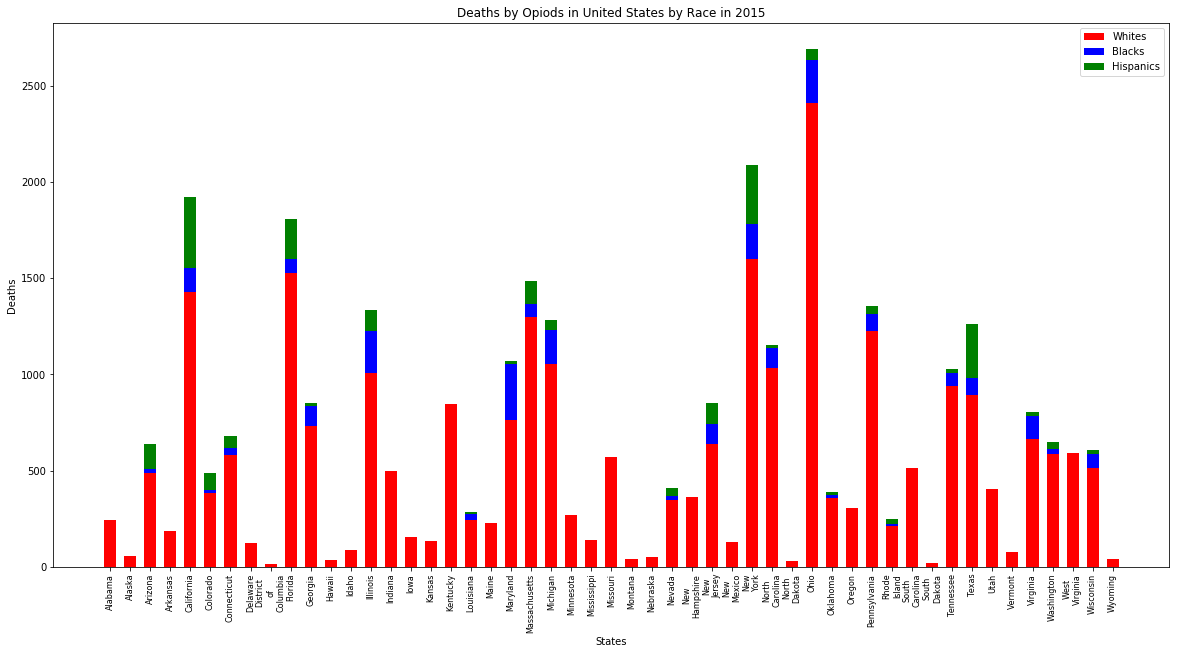

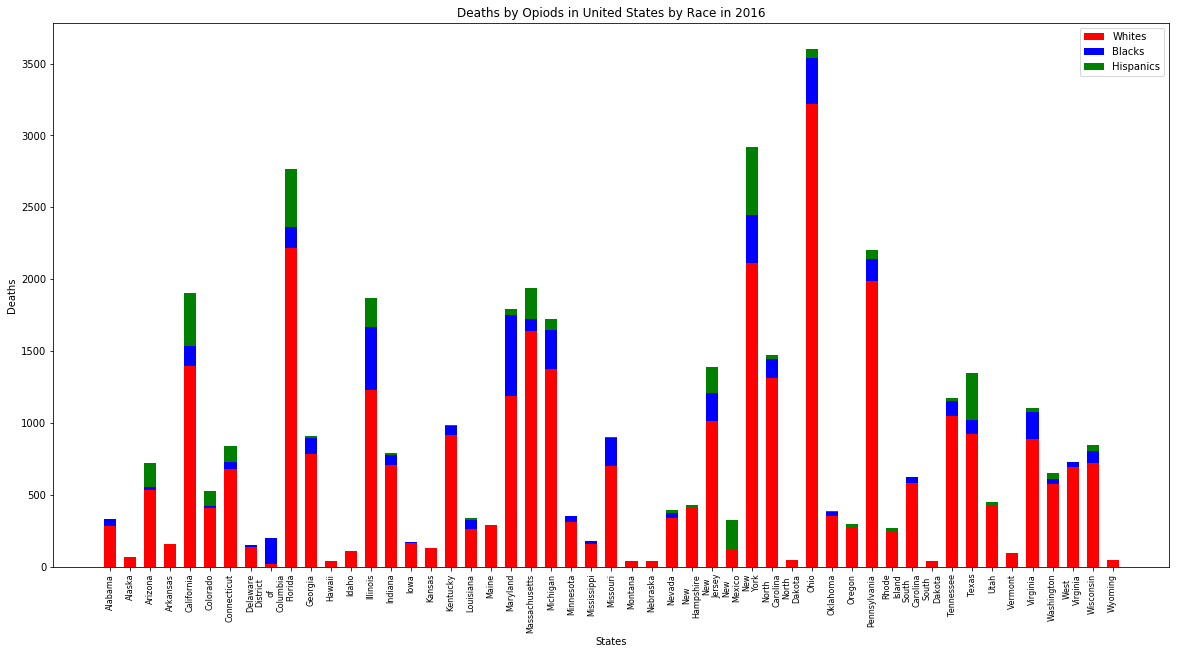

In [13]:
for year in ["2013","2014","2015", "2016"]:
    whites = df[year + '__White']
    blacks = df[year + '__Black']
    hispanics = df[year + '__Hispanic']
    width = 3
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 20
    fig_size[1] = 10
    plt.rcParams["figure.figsize"] = fig_size
    
    p1 = plt.bar(ind, whites, width, color='r')
    p2 = plt.bar(ind, blacks, width, bottom=whites, color='b')
    p3 = plt.bar(ind, hispanics, width, 
                 bottom=np.array(whites)+np.array(blacks), color='g')
    plt.ylabel('Deaths')
    plt.xlabel("States")
    plt.title('Deaths by Opiods in United States by Race in ' + year)
    plt.xticks(ind, state_codes,fontsize=8,rotation='vertical')
    plt.legend((p1[0], p2[0],p3[0]), ('Whites', 'Blacks','Hispanics'))
    plt.savefig(year + '_Deaths.png')
    plt.show()